<a href="https://colab.research.google.com/github/Raagulbharatwaj/BERT/blob/main/Gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gensim**

Open source library in python written by Radim Rehurek which is used in unsupervised topic modelling and natural language processing

Designed to extract semantic topics from documents

Can handle large text collections.

In [ ]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#glove_file = datapath('/home/janaki/Gensim/glove.6B/glove.6B.100d.txt')
glove_file = datapath('/content/gdrive/MyDrive/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)


(400000, 100)

In [ ]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)


### Most Similar
Find the person most similar to Obama

In [ ]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.927285373210907),
 ('clinton', 0.896000325679779),
 ('mccain', 0.8875633478164673),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933662533760071),
 ('dole', 0.7851964831352234),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488929629325867),
 ('kerry', 0.7472624182701111)]

In [ ]:
model.most_similar('banana')


[('coconut', 0.7097253203392029),
 ('mango', 0.7054824829101562),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420575976371765),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [ ]:
# Find most similar things to pen

[('pencil', 0.6101457476615906),
 ('ballpoint', 0.602318286895752),
 ('pens', 0.6019977927207947),
 ('le', 0.5550896525382996),
 ('ink', 0.5227126479148865),
 ('paper', 0.5109255909919739),
 ('mouse', 0.4934431314468384),
 ('stylus', 0.48388636112213135),
 ('punch', 0.48200419545173645),
 ('pocket', 0.47347819805145264)]

In [ ]:
model.most_similar(negative='banana')


[('shunichi', 0.49618104100227356),
 ('ieronymos', 0.4736502170562744),
 ('pengrowth', 0.4668096601963043),
 ('höss', 0.4636845588684082),
 ('damaskinos', 0.4617849290370941),
 ('yadin', 0.4617374837398529),
 ('hundertwasser', 0.4588957726955414),
 ('ncpa', 0.4577339291572571),
 ('maccormac', 0.4566109776496887),
 ('rothfeld', 0.4523947238922119)]

### Evaluate king - man + woman

In [ ]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))



queen: 0.7699


In [ ]:
print(result)

[('queen', 0.7698541283607483), ('monarch', 0.6843380928039551), ('throne', 0.6755735874176025), ('daughter', 0.6594556570053101), ('princess', 0.6520534753799438), ('prince', 0.6517034769058228), ('elizabeth', 0.6464517712593079), ('mother', 0.6311717629432678), ('emperor', 0.6106470823287964), ('wife', 0.6098655462265015)]


### Compute Analogy using Most Similar function

In [ ]:
# x1 - Object that has to be subtracted
# x2, y1 - Objects that needs to be added
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [ ]:
analogy('man','king','woman')

'queen'

In [ ]:
analogy('japan', 'japanese', 'australia')

'australian'

In [ ]:
analogy('australia', 'beer', 'france')


'champagne'

In [ ]:
analogy('tall', 'tallest', 'long')

'longest'

In [ ]:
analogy('good', 'fantastic', 'bad')

'terrible'

### Odd man out

In [ ]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [ ]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.key_to_index.keys()), sample)
        else:
            words = [ word for word in model.key_to_index ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

<IPython.core.display.Javascript object>


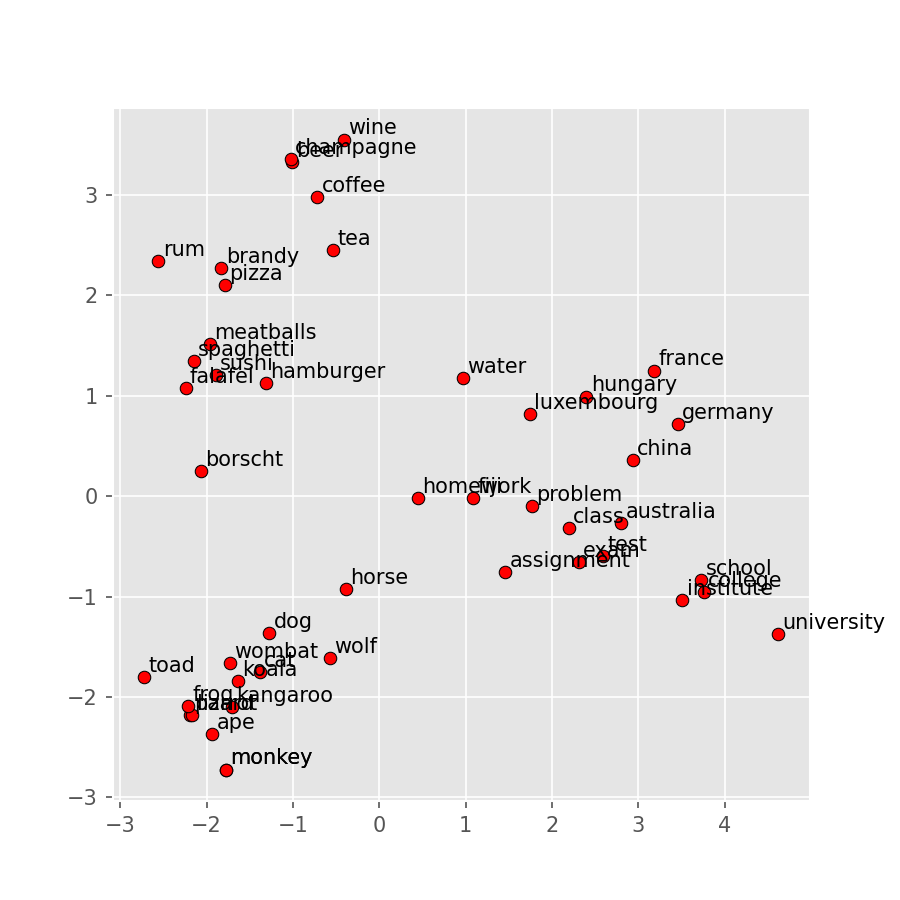

In [ ]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

<IPython.core.display.Javascript object>


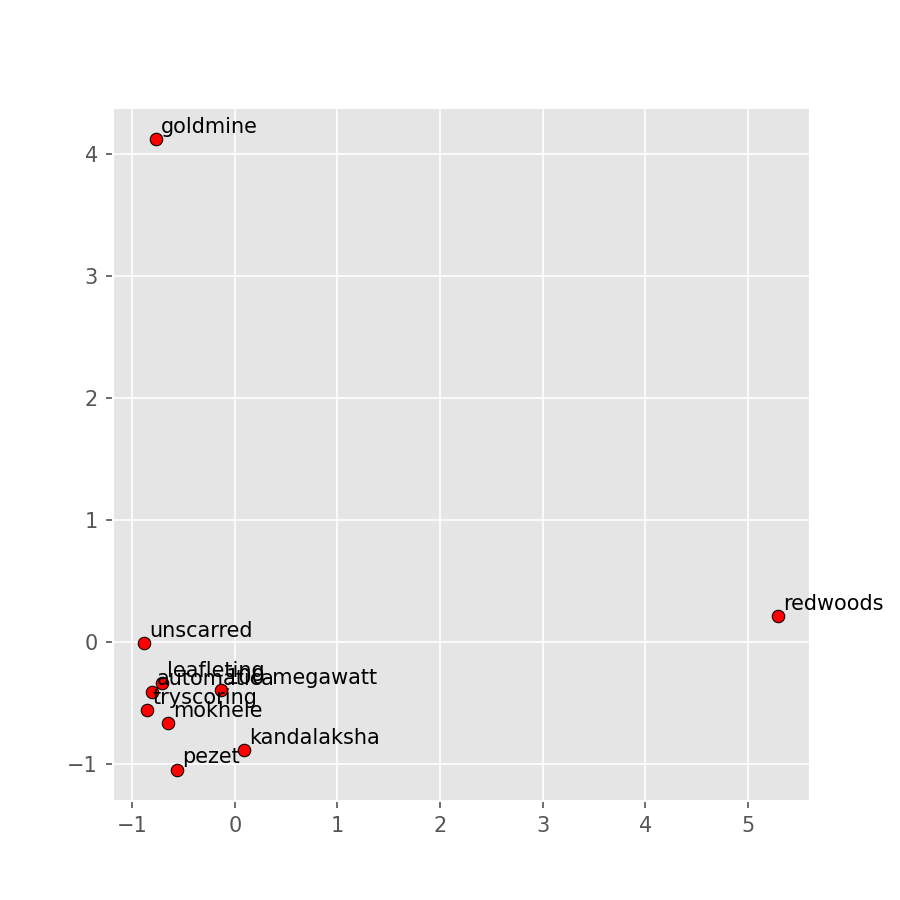

In [ ]:
display_pca_scatterplot(model, sample=10)

In [ ]:
analogy('obama', 'clinton', 'reagan')

'nixon'